<a href="https://colab.research.google.com/github/mohamedzaghloul-lab638/similarity-map-/blob/main/similarity_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 35.5 MB/s eta 0:00:00


In [2]:
from rdkit import Chem , DataStructs
from rdkit.Chem import AllChem , Draw , rdFingerprintGenerator
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.DataStructs import TanimotoSimilarity

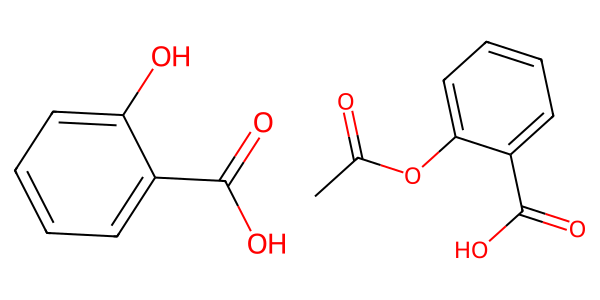

In [22]:
refmol = Chem.MolFromSmiles('C1=CC=C(C(=C1)C(=O)O)O   ') # my refernce here is salicylic acid
mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O    ') #aspirin
Draw.MolsToImage([ refmol , mol] , subImgSize=( 300 , 300))

In [16]:
refmol = Chem.MolFromSmiles('C1=CC=C(C(=C1)C(=O)O)O   ') # salicylic acid
mol = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O    ') #aspirin
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2 , fpSize=2048)
fp_refmol = morgan_gen.GetFingerprint(refmol)
fp_mol = morgan_gen.GetFingerprint(mol)
sim = DataStructs.TanimotoSimilarity(fp_refmol , fp_mol)
print(f'Tanimoto similartity is { sim:.2f}%')



Tanimoto similartity is 0.45%


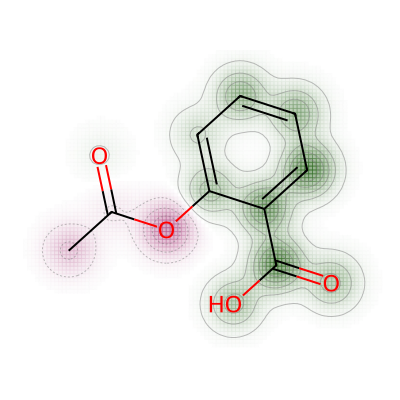

In [18]:
drawer = Draw.MolDraw2DSVG( 400 , 400 )
fp=SimilarityMaps.GetAPFingerprint(mol , fpType='normal')
fp=SimilarityMaps.GetTTFingerprint(mol ,fpType='normal')
fp=SimilarityMaps.GetMorganFingerprint(mol ,fpType='bv')
fig , maxweight = SimilarityMaps.GetSimilarityMapForFingerprint( refmol , mol , SimilarityMaps.GetMorganFingerprint , draw2d=drawer)

# visualization of mol ( aspirin )
drawer.FinishDrawing()
svg = drawer.GetDrawingText()
from IPython.display import SVG
display(SVG(svg))